#### libs    
  
**numpy** - for fast work with arrays   
**maplotlib.pyplot** - for visualization   
**PIL.Image** - read image as an object
**cv2** - library to work with images 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image as Image

**Data Details:**  
Pedestrian intersection on the Ohio State University campus  
Number of sequences = 10  
Total number of images = 284  
Format of images = 8-bit grayscale bitmap  
Image size = 360 x 240 pixels  
Sampling rate = non-uniform, less than 30Hz  

In [2]:
image = Image.open('3person.jpg')

##### convert Image to numpy array

In [3]:
im = np.array(image)

### function to convert RGB image to grayscale

In [4]:
def rgb2gray(rgb):
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

### function to plot numpy.array

In [5]:
def plot_image(image):
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    plt.show()

##### remove white space around the images

In [6]:
def cut_image(image):
    sliced = gray[60 : 320, 60 : 420]
    return sliced

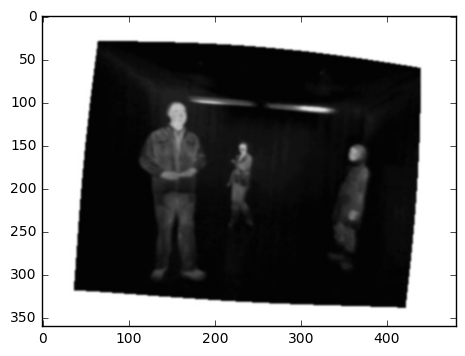

In [7]:
gray = rgb2gray(im)    
plot_image(gray)

In [8]:
image = cut_image(gray)

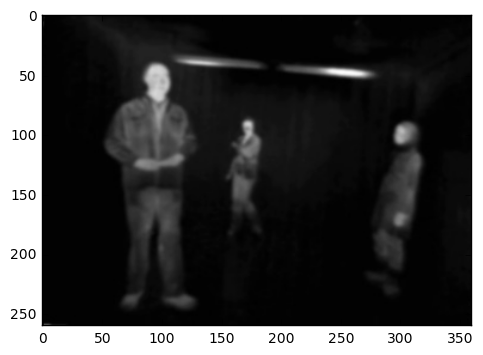

In [9]:
plot_image(image)

In [10]:
image

array([[174,  85,  27, ...,  13,  13,  13],
       [151,  70,  24, ...,  14,  15,  15],
       [117,  48,  18, ...,  14,  14,  14],
       ..., 
       [ 14,  14,  14, ...,  15,  15,  16],
       [ 29,  29,  29, ...,  14,  15,  16],
       [ 89,  89,  89, ...,  15,  15,  16]], dtype=uint8)

In [11]:
img = image.copy()

In [12]:
ret, thresh = cv2.threshold(img, 60, 255, 0)

### first one is source image, second is contour retrieval mode, third is contour approximation method
**contours** is a Python list of all the contours in the image

In [13]:
img, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

### Drawing image contours

In [14]:
img = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

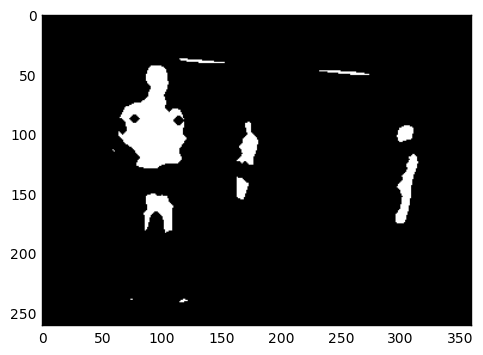

In [15]:
plot_image(img)

### MSER algoryth for image segmentation

In [16]:
mser = cv2.MSER_create()

In [17]:
test_val = image.copy()

In [18]:
regions = mser.detectRegions(test_val, None)

In [19]:
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

In [20]:
len(hulls)

123

In [21]:
len(regions)

123

In [22]:
cv2.polylines(test_val, hulls, 1, (0, 255, 0))

array([[174,  85,  27, ...,  13,  13,  13],
       [151,  70,  24, ...,  14,  15,  15],
       [117,  48,  18, ...,  14,  14,  14],
       ..., 
       [ 14,  14,  14, ...,  15,  15,  16],
       [ 29,  29,  29, ...,  14,  15,  16],
       [ 89,  89,  89, ...,  15,  15,  16]], dtype=uint8)

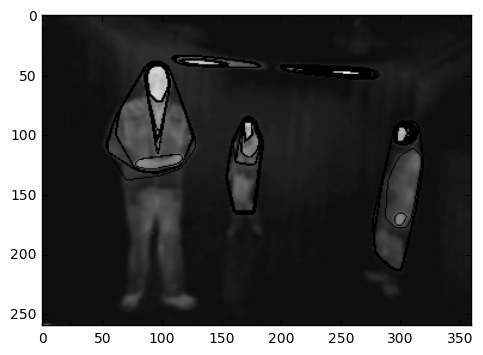

In [23]:
plot_image(test_val)

### For classification use dispersia = perimiter^2/area
###### empirecally found that is should be : dispersia > 25 and (dispersia < 58 or dispersia > 65)     (__empirecally found__)

In [24]:
def calculate_dispersia(contour):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if area > 0:
        dispersia = perimeter ** 2 / area
        return dispersia
    else:
        return 0

### Get contours in rectangles
###### needs for extracting and classification

In [25]:
image_with_recatange_contours = image.copy()

In [26]:
for contour in contours:
    dispersia = calculate_dispersia(contour)
    if dispersia > 25 and (dispersia < 58 or dispersia > 65): # empirecally found
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        image_with_recatange_contours = cv2.drawContours(image_with_recatange_contours, [box], 0, (255, 255, 255), 2)
#         ellipse = cv2.fitEllipse(contour)
#         image_with_recatange_contours = cv2.ellipse(image_with_recatange_contours,ellipse,(255,255,255),2)

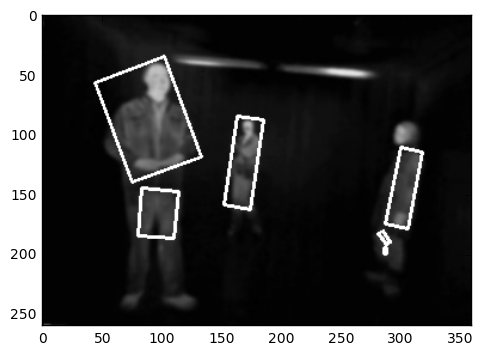

In [27]:
plot_image(image_with_recatange_contours)

### Plot only contours

In [28]:
contours_image = image.copy()

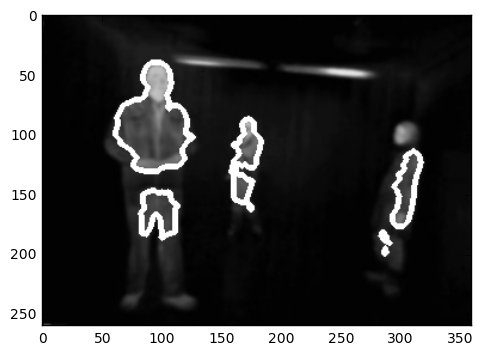

In [29]:
for i in np.arange(len(contours)):
    dispersia = calculate_dispersia(contours[i])
    if dispersia > 25 and (dispersia < 58 or dispersia > 65):
        cv2.drawContours(contours_image, contours, i, (255, 255, 255), 3)
plot_image(contours_image)